# "ML Models for Protein Studies: Introduction"
> "Linear Regression"

- toc: true 
- badges: true
- comments: true
- categories: [Part-1 - Linear_Regression]




## Acknowledgement

**Before getting into the actual project, I would like to thank Jahnavi Hunsigida for being a wonderful research partner on the project; and Dr.Sumohana Channappayya of IIT Hyderabad, for giving me an opportunity to work on this project under his mentorship.**

## Introduction


**The beauty of data science lies in the fact that it can be utilised to solve problems in a wide variety of fields.** And, if you do have some domain-specific knowledge , you can find that it opens up a wide variety of options that can be taken to solve the problem at hand. 

My problem lies in the field of biology, and involves dealing with protein sequences. It is a well-known fact that we have multitudes of protein sequence data available. The basics of biology will tell you that the activity of any protein is dependent not just on its amino acid sequence, but also factors like the way its backbone is designed; the way it folds in 3-D space; the way protein units bind together, etc. 
So, the challenge lies in being able to manipulate only the sequence data – primary structure , in biological jargon - of proteins in order to build models to solve problems in the field. 


The work that follows is a continuation of an already published literature titled , “A machine learning approach for reliable prediction of amino acid interactions and its application in the directed evolution of enantioselective enzymes”, which deals with using only the sequence data to predict a biological parameter called the enantioselectivity value. 



### Literature Summary: ###


The paper discusses a methodology for predicting a property – in this case, the enantioselectivity - of the input protein based on just using its primary sequence. 
 This methodology involves using a Digital Signal Processing Technique called innov’SAR , which is a protein structure independent method. First , the protein sequences are converted into spectrums via amino acid index encoding and Fourier Transform.
These spectrums are supposed to capture epistatic interactions between the different mutations. The converted inputs are used to design a ML model , which will in turn predict e-values for each of the inputs. The overall goal of this undertaking is to reduce the time spent in studying the activity of newly designed proteins by predicting the activity directly from its sequence.

The authors have already explored and established certain models and parameters for the task at hand. My objective is to try some alternative machine learning models and data manipulations on the same problem and obtain some insights of my own. 



**The primary steps involved are as follows:**

> Converting the alphabetical amino-acid sequences into sequences consisting of their respective amino acid indexes. 


> Using Fourier Transform to obtain information embedded in the converted sequences. 


> Using these as input in different Machine Learning models , hoping to capture a relationship between the inputs and the ground truth we are trying to predict - in this case , the E-value.





### Epistasis: ###

Before we go into the specifics , I want to talk about an interesting concept called “Epistasis”. Epistasis occurs when the mutation at a certain point in the gene is affected by a mutation at another site. As you will all see, the dataset we are dealing with consists of different mutants ( single and multi-point ) of epoxide hydrolase from Aspergillus Niger (ANEH). Hence , the model we design must be able to account for the epistatic interactions that may occur when we have a sample with mutations at multiple sites. This is especially important when we want to predict the enantioselectivity of unknown mutants.




### Data Modelling: ###

A very vital step of any Machine Learning project involves converting the raw inputs into a form suitable for interpretation by a ML algorithm. This step is especially crucial, as the representation of the input will majorly impact the performance of the model.



### Amino Acid Indexes: ###

The first step involves converting the alphabetical sequences of the inputs into a numerical form which is suitable for use in a machine learning model. For this purpose, we are going to use amino acid indexes. 
Amino Acid indexes are numerical quantities we assign to each amino acid; it is based on the physical or chemical characteristic we are dealing with ( AAindex: Amino Acid index database ). In this project, I will be trying a variety of AA indexes and comparing their performance in each modelling scenario.



### Machine Learning Models: ###

It should be obvious that the task at hand requires us to predict a continuous value , making this a regression problem. Keeping this is mind , we will focus on the performance of 2 ML regression models:

1.	Linear Regression 

2.	Support Vector Regression


### Dataset: ###

Set 1:  1 Wild-Type + 9 single point mutants of ANEH 

Set 2: 28 Multi-point mutants of ANEH

The E-values for the mutants were measured in the lab.

This dataset was obtained from the supplementary section of the paper. 


## Basic Linear Regression

**We are going to start things off by using basic linear regression to model the problem. The amino acid index we are choosing is called EIIP.**

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Dictionary containing the amino acids and their respective indexes
dict_eiip = {'A': 0.0373,
 'R': 0.0959,
 'N': 0.0036,
 'D': 0.1263,
 'C': 0.0829,
 'Q': 0.0761,
 'E': 0.0058,
 'G': 0.005,
 'H': 0.0242,
 'I': 0,
 'L': 0,
 'K': 0.0371,
 'M': 0.0823,
 'F': 0.0946,
 'P': 0.0198,
 'S': 0.0829,
 'T': 0.0941,
 'W': 0.0548,
 'Y': 0.0516,
 'V': 0.0057}

In [3]:
#Creating a function to convert the alphabetical sequences into EIIP sequences
def num_convert(x):
    return [dict_eiip[i] for i in x]
        

In [4]:
data = pd.read_csv("ee_train.csv")

In [5]:
data.head()

,Type,Sequence,EE,G
0,WT,LARLTTMLC,4,-0.85
1,1,FARLTTMLC,12,-1.50
2,2,LNRLTTMLC,7,-1.17
3,3,LASLTTMLC,4,-0.85
4,4,LARYTTMLC,4,-0.85


As we can see, the Sequence column contains the protein sequences found in the training dataset. The ground truth we are dealing with here is a converted value called Free Energy (G). 

Formula:

ΔΔG‡=−RT ln (E)

Where E is the enantioselectivity

In [6]:
data.shape

(10, 4)

In [7]:
x_train = [num_convert(x) for x in data["Sequence"]]

In [8]:
print(x_train)

[[0, 0.0373, 0.0959, 0, 0.0941, 0.0941, 0.0823, 0, 0.0829], [0.0946, 0.0373, 0.0959, 0, 0.0941, 0.0941, 0.0823, 0, 0.0829], [0, 0.0036, 0.0959, 0, 0.0941, 0.0941, 0.0823, 0, 0.0829], [0, 0.0373, 0.0829, 0, 0.0941, 0.0941, 0.0823, 0, 0.0829], [0, 0.0373, 0.0959, 0.0516, 0.0941, 0.0941, 0.0823, 0, 0.0829], [0, 0.0373, 0.0959, 0, 0.0548, 0.0941, 0.0823, 0, 0.0829], [0, 0.0373, 0.0959, 0, 0.0941, 0.0057, 0.0823, 0, 0.0829], [0, 0.0373, 0.0959, 0, 0.0941, 0.0941, 0.0198, 0, 0.0829], [0, 0.0373, 0.0959, 0, 0.0941, 0.0941, 0.0823, 0.0516, 0.0829], [0, 0.0373, 0.0959, 0, 0.0941, 0.0941, 0.0823, 0, 0.0057]]


In [9]:
type(x_train[0][0])

int

In [10]:
y_train = data["G"]
print(y_train)

0   -0.85
1   -1.50
2   -1.17
3   -0.85
4   -0.85
5   -1.50
6   -0.85
7   -1.08
8   -0.85
9   -0.97
Name: G, dtype: float64


In [11]:
x_train = np.array(x_train)

In [12]:
print(x_train)

[[0.     0.0373 0.0959 0.     0.0941 0.0941 0.0823 0.     0.0829]
 [0.0946 0.0373 0.0959 0.     0.0941 0.0941 0.0823 0.     0.0829]
 [0.     0.0036 0.0959 0.     0.0941 0.0941 0.0823 0.     0.0829]
 [0.     0.0373 0.0829 0.     0.0941 0.0941 0.0823 0.     0.0829]
 [0.     0.0373 0.0959 0.0516 0.0941 0.0941 0.0823 0.     0.0829]
 [0.     0.0373 0.0959 0.     0.0548 0.0941 0.0823 0.     0.0829]
 [0.     0.0373 0.0959 0.     0.0941 0.0057 0.0823 0.     0.0829]
 [0.     0.0373 0.0959 0.     0.0941 0.0941 0.0198 0.     0.0829]
 [0.     0.0373 0.0959 0.     0.0941 0.0941 0.0823 0.0516 0.0829]
 [0.     0.0373 0.0959 0.     0.0941 0.0941 0.0823 0.     0.0057]]


### The Regression Model ###

Ordinary Least Square Regression

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() 

In [14]:
#Training the linear regression model on the training dataset
reg.fit(x_train,y_train)

LinearRegression()

**Predicting the value of the random datapoint**

In [15]:
# Lets give it a sample
demo_1 = "LARLTTPYC"
x_trial = num_convert(demo_1)


In [16]:

x_trial = np.array([x_trial])
print(x_trial)

[[0.     0.0373 0.0959 0.     0.0941 0.0941 0.0198 0.0516 0.0829]]


In [17]:
#Predicting the value of the random datapoint
print(reg.predict(x_trial))


[-1.08]


**Now, lets go to the test dataset**

In [18]:
data_test = pd.read_csv("ee_test.csv")
data_test.head()

,Sequence,G,EE
0,FNSLTTMLC,-1.68,16.29
1,LARLTTPYC,-0.87,4.24
2,LARLWVMLC,-1.68,16.29
3,FNSLTTPYC,-1.84,21.25
4,FNSLTTMLV,-1.67,16.02


In [19]:
#There are 28 multi-point mutants in the test dataset
data_test.shape

(28, 3)

In [20]:
x_test = [num_convert(x) for x in data_test["Sequence"]]

In [21]:
x_test = np.array(x_test)

In [22]:
prediction = reg.predict(x_test)

In [23]:
print(prediction)

[-1.82 -1.08 -1.5  -2.05 -1.94 -2.47 -1.82 -1.2  -1.73 -1.08 -1.62 -0.97
 -1.5  -2.17 -2.7  -2.05 -2.59 -1.94 -2.47 -1.85 -1.2  -1.73 -1.62 -2.17
 -2.82 -2.7  -2.59 -2.82]


In [24]:
y_test = data_test["G"]
print(y_test)

0    -1.68
1    -0.87
2    -1.68
3    -1.84
4    -1.67
5    -2.19
6    -1.93
7    -0.90
8    -1.30
9    -0.98
10   -1.73
11   -0.89
12   -1.88
13   -1.92
14   -2.15
15   -1.96
16   -2.41
17   -1.85
18   -2.37
19   -1.51
20   -0.92
21   -1.75
22   -1.74
23   -2.57
24   -2.09
25   -2.32
26   -2.73
27   -2.87
Name: G, dtype: float64


**Test Score**

In [25]:
#The r2 score for the predictions
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.7308241521828205

**Training Score**

In [26]:
#The training score 
reg.score(x_train,y_train)

1.0

In [27]:
#Pearson correlation for the prediction
from scipy.stats import pearsonr

corr, _ = pearsonr(y_test, prediction)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.893


<function matplotlib.pyplot.show(close=None, block=None)>

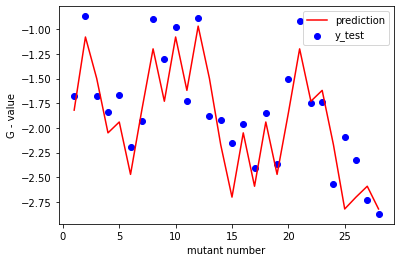

In [28]:
#Plotting the predicted value and the actual value
plt.scatter(range(1,29),y_test,c = "blue")
plt.plot(range(1,29),prediction , c="red")
plt.xlabel("mutant number")
plt.ylabel("G - value")
plt.legend(["prediction","y_test"])
plt.show

From just looking at the R2 score, we can probably say that the model does relatively well for the limited number of datapoints we are dealing with. However , the problem we are dealing with is not quite as simple as getting the line of closest fit due to the problem of epistasis. 

To calculate epistasis , we need to see if the e-value obtained due to multiple mutations is lower or higher than the theoretical additive value obtained by adding each individual mutation. Higher leads to positive epistasis; lower leads to negative epistasis. Hence, even if the predicted e-value is close to the actual value , there is the aspect of predicting the correct epistatic state. 

Now, when it comes to the linear regression model , the predicted values for the multi-mutant test set is an exact match with the theoretical additive e-values. This observation stays the same regardless of the nature of the amino-acid index we use (This will be proved in later sections of the post, where we try other AA indexes).


**Now, to verify if the linear regression model is insensitive to the exact values of the indexes, lets try a one-hot encoding model.**

### Trying a One-hot Model ###

In [29]:
#Function for breaking down each sequence into a list of letters
def seq_convert(x):
    entry = []
    for i in x:
        entry.append(i)
    return entry

In [30]:
#Demonstration of the function
demo_1 = "LARLTTPYC"
seq_convert(demo_1)

['L', 'A', 'R', 'L', 'T', 'T', 'P', 'Y', 'C']

In [31]:
letter_vector_train = [seq_convert(x) for x in data["Sequence"]]

In [32]:
letter_vector_test = [seq_convert(x) for x in data_test["Sequence"]]

In [33]:
#Combining the 2 letter vectors and displaying them
letter_vector = np.append(letter_vector_train,letter_vector_test,axis = 0)
print(len(letter_vector))
print(letter_vector)

38
[['L' 'A' 'R' 'L' 'T' 'T' 'M' 'L' 'C']
 ['F' 'A' 'R' 'L' 'T' 'T' 'M' 'L' 'C']
 ['L' 'N' 'R' 'L' 'T' 'T' 'M' 'L' 'C']
 ['L' 'A' 'S' 'L' 'T' 'T' 'M' 'L' 'C']
 ['L' 'A' 'R' 'Y' 'T' 'T' 'M' 'L' 'C']
 ['L' 'A' 'R' 'L' 'W' 'T' 'M' 'L' 'C']
 ['L' 'A' 'R' 'L' 'T' 'V' 'M' 'L' 'C']
 ['L' 'A' 'R' 'L' 'T' 'T' 'P' 'L' 'C']
 ['L' 'A' 'R' 'L' 'T' 'T' 'M' 'Y' 'C']
 ['L' 'A' 'R' 'L' 'T' 'T' 'M' 'L' 'V']
 ['F' 'N' 'S' 'L' 'T' 'T' 'M' 'L' 'C']
 ['L' 'A' 'R' 'L' 'T' 'T' 'P' 'Y' 'C']
 ['L' 'A' 'R' 'L' 'W' 'V' 'M' 'L' 'C']
 ['F' 'N' 'S' 'L' 'T' 'T' 'P' 'Y' 'C']
 ['F' 'N' 'S' 'L' 'T' 'T' 'M' 'L' 'V']
 ['F' 'N' 'S' 'L' 'W' 'V' 'M' 'L' 'C']
 ['F' 'N' 'S' 'Y' 'T' 'T' 'M' 'L' 'C']
 ['L' 'A' 'R' 'L' 'T' 'T' 'P' 'Y' 'V']
 ['L' 'A' 'R' 'L' 'W' 'V' 'P' 'Y' 'C']
 ['L' 'A' 'R' 'Y' 'T' 'T' 'P' 'Y' 'C']
 ['L' 'A' 'R' 'L' 'W' 'V' 'M' 'L' 'V']
 ['L' 'A' 'R' 'Y' 'T' 'T' 'M' 'L' 'V']
 ['L' 'A' 'R' 'Y' 'W' 'V' 'M' 'L' 'C']
 ['F' 'N' 'S' 'L' 'T' 'T' 'P' 'Y' 'V']
 ['F' 'N' 'S' 'L' 'W' 'V' 'P' 'Y' 'C']
 ['F' 'N' 'S' 'Y' 'T' 

In [34]:
from sklearn.preprocessing import OneHotEncoder

Fitting the one hot encoder

In [35]:
#Fitting the One-Hot encoder
enc = OneHotEncoder()
enc.fit(letter_vector)

OneHotEncoder()

The one hod encoded vector for each of the 38 sequences in the dataset

In [36]:
#The one-hot encoded vector for each of the 38 sequences in out dataset
print(enc.transform(letter_vector).toarray())
one_hot_vector = enc.transform(letter_vector).toarray()

[[0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 1. 0. 1. 0.

In [37]:
one_x_train = one_hot_vector[0:10]
one_x_test = one_hot_vector[10:]
print(len(one_x_train))
print(len(one_x_test))

10
28


In [38]:
reg = LinearRegression()
reg.fit(one_x_train,y_train)

LinearRegression()

**Training Score**

In [39]:
reg.score(one_x_train,y_train)

1.0

In [40]:
prediction_one = reg.predict(one_x_test)
print(prediction_one)

[-1.82 -1.08 -1.5  -2.05 -1.94 -2.47 -1.82 -1.2  -1.73 -1.08 -1.62 -0.97
 -1.5  -2.17 -2.7  -2.05 -2.59 -1.94 -2.47 -1.85 -1.2  -1.73 -1.62 -2.17
 -2.82 -2.7  -2.59 -2.82]


**Test Score**

In [41]:
print(r2_score(y_test,prediction_one))

0.7308241521828207


**Pearson Correlation Co-efficient**

In [42]:
corr, _ = pearsonr(y_test, prediction_one)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.893


<function matplotlib.pyplot.show(close=None, block=None)>

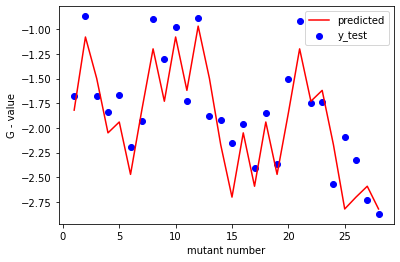

In [43]:
plt.scatter(range(1,29),y_test,c = "blue")
plt.plot(range(1,29),prediction_one , c="red")
plt.xlabel("mutant number")
plt.ylabel("G - value")
plt.legend(["predicted","y_test"])
plt.show

In [45]:
comparision_dict= {"EIIP + LR":prediction,"One_Hot + LR":prediction_one}
comparision_df = pd.DataFrame(comparision_dict)
comparision_df

,EIIP + LR,One_Hot + LR
0,-1.82,-1.82
1,-1.08,-1.08
2,-1.50,-1.50
3,-2.05,-2.05
4,-1.94,-1.94
5,-2.47,-2.47
6,-1.82,-1.82
7,-1.20,-1.20
8,-1.73,-1.73
9,-1.08,-1.08


**From the above results, we can quite confidently say that for a simple linear model , the numerical value assigned to each amino acid doesn't really impact the model. Thus, this model doesn't help us capture epistasis.**